# testing out interpolation

trying to interpolate the ET and LAI .nc files together. they have very similar dimensions (lon-lat for Illinois for ET is 99-138 and LAI is 100-139)

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
ds = xr.open_dataset('~/Downloads/lai_all_IL.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 6935, lon: 100, lat: 137)
Coordinates:
  * time     (time) float64 2.001e+07 2.001e+07 ... 2.019e+07 2.019e+07
  * lon      (lon) float64 -91.5 -91.46 -91.42 -91.38 ... -87.62 -87.58 -87.54
  * lat      (lat) float64 37.02 37.06 37.1 37.14 ... 42.34 42.38 42.42 42.46
Data variables:
    Band1    (time, lat, lon) float32 ...
Attributes:
    CDI:                 Climate Data Interface version 1.9.9rc1 (https://mpi...
    Conventions:         CF-1.5
    history:             Tue Apr 19 16:20:00 2022: cdo sellonlatbox,-91.51,-8...
    GDAL_AREA_OR_POINT:  Area
    GDAL:                GDAL 3.0.4, released 2020/01/28
    NCO:                 netCDF Operators version 4.9.1 (Homepage = http://nc...
    CDO:                 Climate Data Operators version 1.9.9rc1 (https://mpi...

In [3]:
print(ds.time.values)

[20010101. 20010102. 20010103. ... 20191229. 20191230. 20191231.]


time values look fine (Y:M:D) so let's plot to make sure the cdo was fine on both the ET and LAI data

In [4]:
et_data = Dataset("IL_2019365.nc", "r", format="NETCDF4")

et_LAT = et_data.variables['lat'][:]  
et_LON = et_data.variables['lon'][:]
et_data = et_data.variables['ET'][:]
et_data[et_data<0] = np.nan

lai_data = Dataset("IL_LAI2019365.nc", "r", format="NETCDF4")

lai_LAT = lai_data.variables['lat'][:]  
lai_LON = lai_data.variables['lon'][:]
lai_data = lai_data.variables['Band1'][:]
lai_data[lai_data<0] = np.nan

<ipython-input-5-d4234c92d439>:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c_scheme1 = universal_map.pcolormesh(x, y, et_data, cmap='jet')


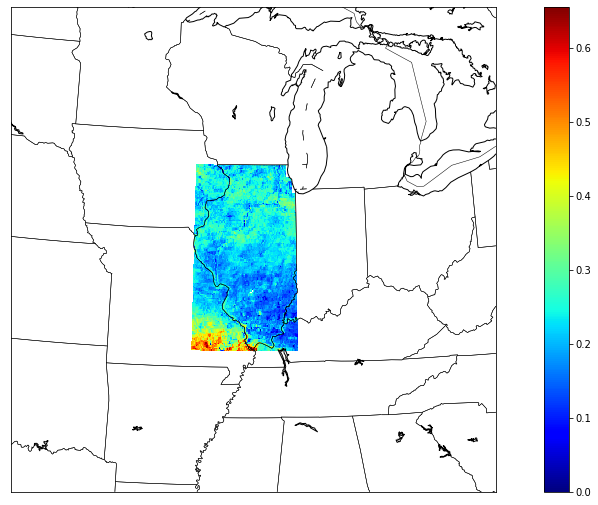

In [5]:
plt.figure(figsize=(10,10))

universal_map = Basemap(projection='lcc', resolution='i',
            width= 1.6E6, height= 1.6E6, 
            lat_0= 40, lon_0= -89.2)

# Basemap wants it's own type of x & y aside from the meshgrid, so just follow this
lons, lats = np.meshgrid(et_LON, et_LAT)
x, y = universal_map(lons, lats) #mapping them together 

# consider this as the outline for the map that is to be created 
universal_map.drawcoastlines()
universal_map.drawstates()
universal_map.drawcountries()

c_scheme1 = universal_map.pcolormesh(x, y, et_data, cmap='jet')
cbar1 = universal_map.colorbar(c_scheme1, location='right', pad='10%') # map information
plt.show()

<ipython-input-6-db2ba6a7c612>:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c_scheme1 = universal_map.pcolormesh(x, y, lai_data, cmap='jet')


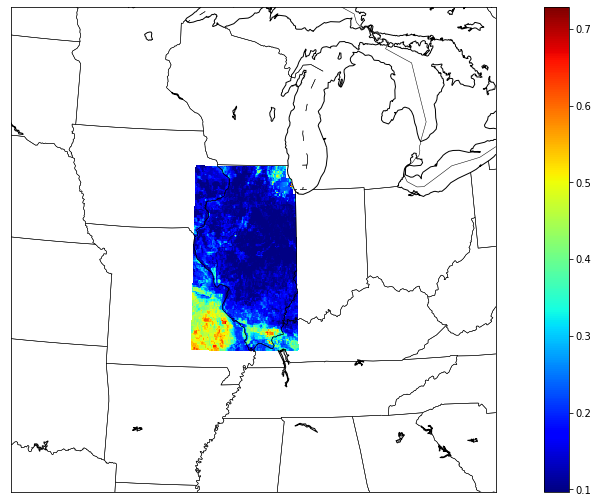

In [6]:
plt.figure(figsize=(10,10))

universal_map = Basemap(projection='lcc', resolution='i',
            width= 1.6E6, height= 1.6E6, 
            lat_0= 40, lon_0= -89.2)

# Basemap wants it's own type of x & y aside from the meshgrid, so just follow this
lons, lats = np.meshgrid(lai_LON, lai_LAT)
x, y = universal_map(lons, lats) #mapping them together 

# consider this as the outline for the map that is to be created 
universal_map.drawcoastlines()
universal_map.drawstates()
universal_map.drawcountries()

c_scheme1 = universal_map.pcolormesh(x, y, lai_data, cmap='jet')
cbar1 = universal_map.colorbar(c_scheme1, location='right', pad='10%') # map information
plt.show()

so looks like the cropping was fine, now lets try to interpolate them with cdo

In [7]:
print(f"num steps for LAI: {lai_LAT.size}")
lai_LAT

num steps for LAI: 137


masked_array(data=[37.01999953, 37.05999952, 37.09999952, 37.13999952,
                   37.17999952, 37.21999952, 37.25999952, 37.29999952,
                   37.33999952, 37.37999952, 37.41999952, 37.45999952,
                   37.49999951, 37.53999951, 37.57999951, 37.61999951,
                   37.65999951, 37.69999951, 37.73999951, 37.77999951,
                   37.81999951, 37.85999951, 37.89999951, 37.93999951,
                   37.9799995 , 38.0199995 , 38.0599995 , 38.0999995 ,
                   38.1399995 , 38.1799995 , 38.2199995 , 38.2599995 ,
                   38.2999995 , 38.3399995 , 38.3799995 , 38.41999949,
                   38.45999949, 38.49999949, 38.53999949, 38.57999949,
                   38.61999949, 38.65999949, 38.69999949, 38.73999949,
                   38.77999949, 38.81999949, 38.85999948, 38.89999948,
                   38.93999948, 38.97999948, 39.01999948, 39.05999948,
                   39.09999948, 39.13999948, 39.17999948, 39.21999948,
      

In [8]:
print(f"num steps for ET: {et_LAT.size}")
et_LAT

num steps for ET: 138


masked_array(data=[42.48, 42.44, 42.4 , 42.36, 42.32, 42.28, 42.24, 42.2 ,
                   42.16, 42.12, 42.08, 42.04, 42.  , 41.96, 41.92, 41.88,
                   41.84, 41.8 , 41.76, 41.72, 41.68, 41.64, 41.6 , 41.56,
                   41.52, 41.48, 41.44, 41.4 , 41.36, 41.32, 41.28, 41.24,
                   41.2 , 41.16, 41.12, 41.08, 41.04, 41.  , 40.96, 40.92,
                   40.88, 40.84, 40.8 , 40.76, 40.72, 40.68, 40.64, 40.6 ,
                   40.56, 40.52, 40.48, 40.44, 40.4 , 40.36, 40.32, 40.28,
                   40.24, 40.2 , 40.16, 40.12, 40.08, 40.04, 40.  , 39.96,
                   39.92, 39.88, 39.84, 39.8 , 39.76, 39.72, 39.68, 39.64,
                   39.6 , 39.56, 39.52, 39.48, 39.44, 39.4 , 39.36, 39.32,
                   39.28, 39.24, 39.2 , 39.16, 39.12, 39.08, 39.04, 39.  ,
                   38.96, 38.92, 38.88, 38.84, 38.8 , 38.76, 38.72, 38.68,
                   38.64, 38.6 , 38.56, 38.52, 38.48, 38.44, 38.4 , 38.36,
                   38.32,

## looking at the latitudes

the latitude values are stagnated which is very annoying

- ET ranges from 37.00 to 42.48, 0.04 steps
- LAI ranges from 37.02 to 42.46, 0.04 steps

one option is to just shift one of them over by 0.02 and slightly lose some information in the data, another is to try out cdo's interpolation, so we'll try both

(lets also look at the longitudes as well first)

In [9]:
print(f"num steps for LAI: {lai_LON.size}")
lai_LON

num steps for LAI: 100


masked_array(data=[-91.50000167, -91.46000167, -91.42000167, -91.38000167,
                   -91.34000167, -91.30000167, -91.26000167, -91.22000168,
                   -91.18000168, -91.14000168, -91.10000168, -91.06000168,
                   -91.02000168, -90.98000168, -90.94000168, -90.90000168,
                   -90.86000168, -90.82000168, -90.78000169, -90.74000169,
                   -90.70000169, -90.66000169, -90.62000169, -90.58000169,
                   -90.54000169, -90.50000169, -90.46000169, -90.42000169,
                   -90.38000169, -90.3400017 , -90.3000017 , -90.2600017 ,
                   -90.2200017 , -90.1800017 , -90.1400017 , -90.1000017 ,
                   -90.0600017 , -90.0200017 , -89.9800017 , -89.9400017 ,
                   -89.90000171, -89.86000171, -89.82000171, -89.78000171,
                   -89.74000171, -89.70000171, -89.66000171, -89.62000171,
                   -89.58000171, -89.54000171, -89.50000171, -89.46000172,
                   -89.42

In [10]:
print(f"num steps for ET: {et_LON.size}")
et_LON

num steps for ET: 99


masked_array(data=[-91.48, -91.44, -91.4 , -91.36, -91.32, -91.28, -91.24,
                   -91.2 , -91.16, -91.12, -91.08, -91.04, -91.  , -90.96,
                   -90.92, -90.88, -90.84, -90.8 , -90.76, -90.72, -90.68,
                   -90.64, -90.6 , -90.56, -90.52, -90.48, -90.44, -90.4 ,
                   -90.36, -90.32, -90.28, -90.24, -90.2 , -90.16, -90.12,
                   -90.08, -90.04, -90.  , -89.96, -89.92, -89.88, -89.84,
                   -89.8 , -89.76, -89.72, -89.68, -89.64, -89.6 , -89.56,
                   -89.52, -89.48, -89.44, -89.4 , -89.36, -89.32, -89.28,
                   -89.24, -89.2 , -89.16, -89.12, -89.08, -89.04, -89.  ,
                   -88.96, -88.92, -88.88, -88.84, -88.8 , -88.76, -88.72,
                   -88.68, -88.64, -88.6 , -88.56, -88.52, -88.48, -88.44,
                   -88.4 , -88.36, -88.32, -88.28, -88.24, -88.2 , -88.16,
                   -88.12, -88.08, -88.04, -88.  , -87.96, -87.92, -87.88,
                   -87.84

## looking at longitudes

same deal here where they're shifted 0.02 apart, so this means that each corner of the LAI data is in the middle of an ET grid space

## interpolation

cdo has a few methods for interpolation [[website](https://code.mpimet.mpg.de/projects/cdo/wiki/Tutorial#Interpolation)]:

they support a good amount of interpolation types:
- bilinear (`remapbil`)
- bicubic (`remapbic`) 
- nearest neighbor (`remapnn`)
- distance-weighted average (`remapdis`)
- first order conservative (`remapycon`, `remapcon`)
- second order conservative (`remapcon2`)
- larget area fraction (`remaplaf`)  

(**below is probably what we want**)  

To remap data to a different grid of another data file. Assume, your data file is called infile and you want to remap 
it to the same grid as the file other_data.nc.
Use the other_data.nc as grid template to remap your infile to the same grid:

`cdo -remapycon,other_data.nc infile outfile`  

then there's making a user-defined grid with just a text file where i can specify the increments and everything, but this seems redundant when we already have files to go from and can just use those 

### time interpolation

you can also interpolate over time steps, I think there are a few missing time values so we can run that if we want  
example for 1 hourly data:  
`% cdo -inttime,2011-01-01,00:00,1hour infile outfile`

## actually interpolating

below i'm using the ET data as the grid that I'll interpolate LAI to, so ET will keep its grid, and LAI will be interpolated to that grid. I'll try out a few interpolation methods and plot them out

In [11]:
from subprocess import run

interpolation_method = 'remapbil'
base_file = 'IL_2019365.nc' # ET data
file_to_be_remapped = 'IL_LAI2019365.nc'

arg0 = 'cdo'
arg1 = f'{interpolation_method},{base_file}'
arg2 = file_to_be_remapped
arg3 = f'{interpolation_method[5:]}_{file_to_be_remapped}'

run([arg0, arg1, arg2, arg3], capture_output=False, shell=False)

CompletedProcess(args=['cdo', 'remapbil,IL_2019365.nc', 'IL_LAI2019365.nc', 'bil_IL_LAI2019365.nc'], returncode=0)

In [12]:
# now open the file to check the lats + lons and plot the data

lai_data2 = Dataset(arg3, "r", format="NETCDF4")

lai_LAT2 = lai_data2.variables['lat'][:]  
lai_LON2 = lai_data2.variables['lon'][:]
lai_data2 = lai_data2.variables['Band1'][:]
lai_data2[lai_data2<0] = np.nan

In [13]:
print(f"num steps for LAI: {lai_LAT2.size}")
lai_LAT2

num steps for LAI: 138


masked_array(data=[42.48, 42.44, 42.4 , 42.36, 42.32, 42.28, 42.24, 42.2 ,
                   42.16, 42.12, 42.08, 42.04, 42.  , 41.96, 41.92, 41.88,
                   41.84, 41.8 , 41.76, 41.72, 41.68, 41.64, 41.6 , 41.56,
                   41.52, 41.48, 41.44, 41.4 , 41.36, 41.32, 41.28, 41.24,
                   41.2 , 41.16, 41.12, 41.08, 41.04, 41.  , 40.96, 40.92,
                   40.88, 40.84, 40.8 , 40.76, 40.72, 40.68, 40.64, 40.6 ,
                   40.56, 40.52, 40.48, 40.44, 40.4 , 40.36, 40.32, 40.28,
                   40.24, 40.2 , 40.16, 40.12, 40.08, 40.04, 40.  , 39.96,
                   39.92, 39.88, 39.84, 39.8 , 39.76, 39.72, 39.68, 39.64,
                   39.6 , 39.56, 39.52, 39.48, 39.44, 39.4 , 39.36, 39.32,
                   39.28, 39.24, 39.2 , 39.16, 39.12, 39.08, 39.04, 39.  ,
                   38.96, 38.92, 38.88, 38.84, 38.8 , 38.76, 38.72, 38.68,
                   38.64, 38.6 , 38.56, 38.52, 38.48, 38.44, 38.4 , 38.36,
                   38.32,

In [14]:
print(f"num steps for LAI: {lai_LON2.size}")
lai_LON2

num steps for LAI: 99


masked_array(data=[-91.48, -91.44, -91.4 , -91.36, -91.32, -91.28, -91.24,
                   -91.2 , -91.16, -91.12, -91.08, -91.04, -91.  , -90.96,
                   -90.92, -90.88, -90.84, -90.8 , -90.76, -90.72, -90.68,
                   -90.64, -90.6 , -90.56, -90.52, -90.48, -90.44, -90.4 ,
                   -90.36, -90.32, -90.28, -90.24, -90.2 , -90.16, -90.12,
                   -90.08, -90.04, -90.  , -89.96, -89.92, -89.88, -89.84,
                   -89.8 , -89.76, -89.72, -89.68, -89.64, -89.6 , -89.56,
                   -89.52, -89.48, -89.44, -89.4 , -89.36, -89.32, -89.28,
                   -89.24, -89.2 , -89.16, -89.12, -89.08, -89.04, -89.  ,
                   -88.96, -88.92, -88.88, -88.84, -88.8 , -88.76, -88.72,
                   -88.68, -88.64, -88.6 , -88.56, -88.52, -88.48, -88.44,
                   -88.4 , -88.36, -88.32, -88.28, -88.24, -88.2 , -88.16,
                   -88.12, -88.08, -88.04, -88.  , -87.96, -87.92, -87.88,
                   -87.84

it's been remapped to the ET grid, now let's just plot it to see how it looks in comparison to the original LAI data

<ipython-input-15-7448a7779c5a>:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c_scheme1 = universal_map.pcolormesh(x, y, lai_data, cmap='jet')
<ipython-input-15-7448a7779c5a>:32: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c_scheme2 = map2.pcolormesh(x2, y2, lai_data2, cmap='jet')


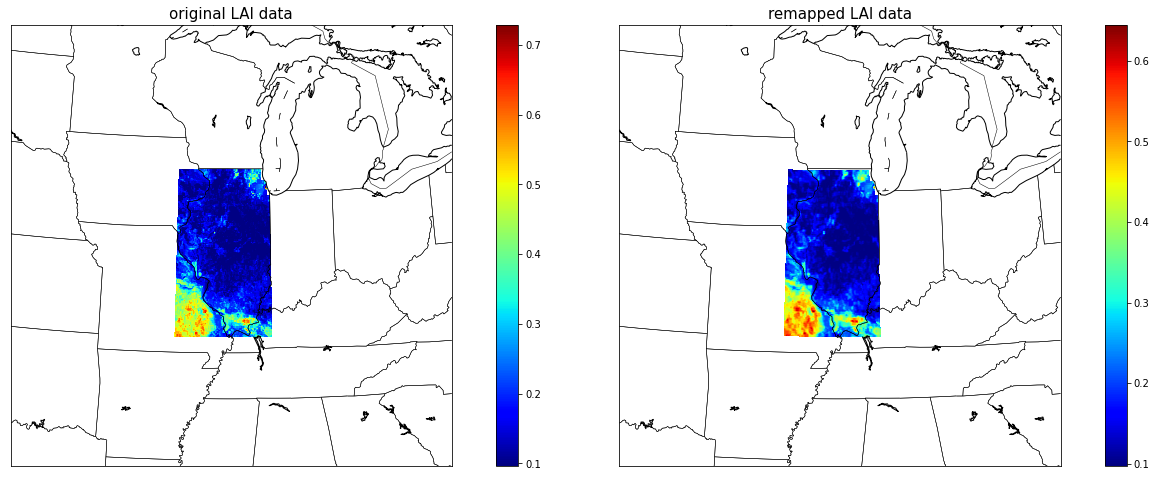

In [15]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(121)
ax.set_title('original LAI data', fontsize=15)
map1 = Basemap(projection='lcc', resolution='i', width= 1.6E6, height= 1.6E6, lat_0= 40, lon_0= -89.2)

# Basemap wants it's own type of x & y aside from the meshgrid, so just follow this
lons, lats = np.meshgrid(lai_LON, lai_LAT)
x, y = map1(lons, lats) #mapping them together 

# consider this as the outline for the map that is to be created 
map1.drawcoastlines()
map1.drawstates()
map1.drawcountries()

c_scheme1 = universal_map.pcolormesh(x, y, lai_data, cmap='jet')
cbar1 = universal_map.colorbar(c_scheme1, location='right', pad='10%') # map information

ax2 = fig.add_subplot(122)
ax2.set_title('remapped LAI data', fontsize=15)
map2 = Basemap(projection='lcc', resolution='i', width= 1.6E6, height= 1.6E6, lat_0= 40, lon_0= -89.2)

# Basemap wants it's own type of x & y aside from the meshgrid, so just follow this
lons2, lats2 = np.meshgrid(lai_LON2, lai_LAT2)
x2, y2 = map2(lons2, lats2) #mapping them together 

# consider this as the outline for the map that is to be created 
map2.drawcoastlines()
map2.drawstates()
map2.drawcountries()

c_scheme2 = map2.pcolormesh(x2, y2, lai_data2, cmap='jet')
cbar2 = map2.colorbar(c_scheme2, location='right', pad='10%') # map information

plt.show()

## interpolating over time-series data

now that we've figured out how to interpolate over one file, let's make sure cdo can do it over multiple time steps. this will be an attempt to use just the one ET file's grid (2019365.nc) and hope that cdo applies it to the output files timesteps (later: which it does)

In [16]:
# processing a 360MB file that I dont want to upload to my pc's cloud, so I'm just keeping it 'offline'
path = '/Users/zacharysating/Downloads'

interpolation_method = 'remapbil'
base_file = 'IL_2019365.nc' # ET data
file_to_be_remapped = 'LAI_all_IL.nc'

arg0 = 'cdo'
arg1 = f'{interpolation_method},{base_file}'
arg2 = f'{path}/{file_to_be_remapped}'
arg3 = f'{path}/{interpolation_method[5:]}_{file_to_be_remapped}'

run([arg0, arg1, arg2, arg3], capture_output=False, shell=False)

CompletedProcess(args=['cdo', 'remapbil,IL_2019365.nc', '/Users/zacharysating/Downloads/LAI_all_IL.nc', '/Users/zacharysating/Downloads/bil_LAI_all_IL.nc'], returncode=0)

running it from the terminal/cmd line, we should see something like:  

`cdo    remapbil: Bilinear weights from lonlat (100x137) to lonlat (99x138) grid, with source mask (13579)`  
`cdo    remapbil: Processed 95009500 values from 1 variable over 6935 timesteps [2.52s 57MB].`

now looking at the dimensions, we see everything is preserved and looks fine

In [17]:
remapped_timeseries = xr.open_dataset(arg3)
remapped_timeseries

<xarray.Dataset>
Dimensions:  (time: 6935, lon: 99, lat: 138)
Coordinates:
  * time     (time) float64 2.001e+07 2.001e+07 ... 2.019e+07 2.019e+07
  * lon      (lon) float32 -91.48 -91.44 -91.4 -91.36 ... -87.64 -87.6 -87.56
  * lat      (lat) float32 42.48 42.44 42.4 42.36 ... 37.12 37.08 37.04 37.0
Data variables:
    Band1    (time, lat, lon) float32 ...
Attributes:
    CDI:                 Climate Data Interface version 2.0.4 (https://mpimet...
    Conventions:         CF-1.5
    history:             Tue Apr 19 15:03:55 2022: cdo remapbil,IL_2019365.nc...
    GDAL_AREA_OR_POINT:  Area
    GDAL:                GDAL 3.0.4, released 2020/01/28
    NCO:                 netCDF Operators version 4.9.1 (Homepage = http://nc...
    CDO:                 Climate Data Operators version 2.0.4 (https://mpimet...

and we see below that there's not much of a difference in size, as we'd expect

In [18]:
from os import path
orig = path.getsize(arg2)
remap = path.getsize(arg3)
print(f'original size: {orig//1000000}MB')
print(f'remapped size: {remap//1000000}MB')

original size: 380MB
remapped size: 379MB


## looking ahead

now since we've figured out how to do interpolation with cdo, we need to figure out:

- the method of interpolation (aka remapping) we want to use
- if we want to use the ET or LAI as a base (or some other grid formation)
- some little nitty gritty details in the data (like use NaN for ocean values or zero, )
- the actual boundaries of the states we want to crop